<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.3 - KNN classification Lab

**In this lab, we will:**
- Practice KNN classification on a dataset of breast cancer.
- Predict the `diagnoosis` of a patient from predictor variables of your choice.

# Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd

import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from scipy import stats
from sklearn import datasets
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split

In [2]:
bc = pd.read_csv('../DATA/breast-cancer-wisconsin-data.csv')
bc

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


#  EDA 

Explore dataset. Clean data. Find correlation. 

In [3]:
bc.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
bc.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
bc = bc.drop(columns=['Unnamed: 32'])

In [6]:
bc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
def outlier_filter(data, no_std_dev = 3):
    '''
    return DF with outlier more than 3x of variance removed
    '''
    for col in data.columns:
        if data[col].dtype == 'float64':
            stand = data[col].std()
            mean = data[col].mean()
            upper_lim = mean + no_std_dev*stand
            lower_lim = mean -no_std_dev*stand
            data[col] = data[col].apply(lambda x: np.nan if x > upper_lim or x < lower_lim else x)
    result = data.dropna()
    return result
bc = outlier_filter(bc)

In [9]:
len(bc.columns)

32

# Set up the `diagnosis` variable as your target. How many classes are there?
2 types of class = 'B' and 'M'

In [10]:
# ANSWER
#target ans we want to find out 
#features help to get targets
y = bc['diagnosis'].value_counts()
y

B    332
M    163
Name: diagnosis, dtype: int64

In [11]:
bc['diagnosis'] = bc['diagnosis'].apply(lambda x: 1 if x =='M' else 0)

In [12]:
bc['diagnosis'].value_counts()

0    332
1    163
Name: diagnosis, dtype: int64

## What is the baseline accuracy?

In [13]:
# ANSWER
bc['diagnosis'].value_counts(normalize=True)

0    0.670707
1    0.329293
Name: diagnosis, dtype: float64

# Choose features to be your predictor variables and set up your X.

In [14]:
# ANSWER
feat = bc.columns[2:]
X = bc[feat]
y = bc['diagnosis']

# Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [15]:
# ANSWER
# Make an instance of a KNeighborsClassifier object with 1 neighbor
neigh = KNeighborsClassifier(n_neighbors=1)
# fit on the unstandardized data:
neigh.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

## Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [16]:
# ANSWER
# predict the response values for the observations in X ("test the model")
print(neigh.score(X,y))
# store the predicted response values
y_pred = neigh.predict(X)

1.0


In [18]:
y_pred = pd.DataFrame(y_pred)

In [19]:
y_pred.value_counts(normalize=True)

0    0.670707
1    0.329293
dtype: float64

# Create a 80-20 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [24]:
# ANSWER
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, x_test, y_train, y_test = train_test_split(X,y,random_state=42)
# STEP 2: train the model on the training set (using K=1)
neigh.fit(X_train,y_train)
# STEP 3: test the model on the testing set, and check the accuracy
neigh.score(x_test,y_test)

0.8951612903225806

# Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [27]:
KNN = len(X_train)
KNN

371

In [30]:
# ANSWER
# Create an instance of KNeighborsClassifier where n_neighbors = number of rows in the training data
knn = KNeighborsClassifier(n_neighbors=KNN)
# Fit Train Data
knn.fit(X_train, y_train)
# Print accuracy_score
knn.score(x_test,y_test)

0.6290322580645161

# Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [31]:
# ANSWER
# plot test accuracy by number of neighbors:
len(X_train.index)

371

In [39]:
def plot_knn_score(X_train,y_train,X_test,y_test,KNN):
    knnscore= []
    for i in range(1,KNN):
        #create model
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        knnscore.append(knn.score(x_test, y_test))
    return knnscore

In [41]:
y_plot = plot_knn_score(X_train,y_train,x_test,y_test,len(X_train.index))
x_plot = np.arange(len(X_train.index)-1)

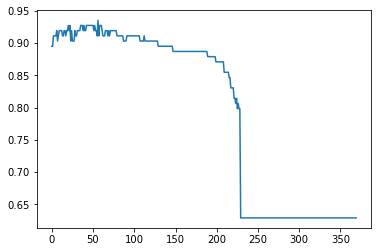

In [42]:
plt.plot(x_plot,y_plot)

# Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.


In [48]:
# ANSWER
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
scoring = []
for k in range(1,KNN):
    knn = KNeighborsClassifier(n_neighbors=k)
    mean = np.mean(cross_val_score(knn,X,y))
    scoring.append(mean)

<AxesSubplot:>

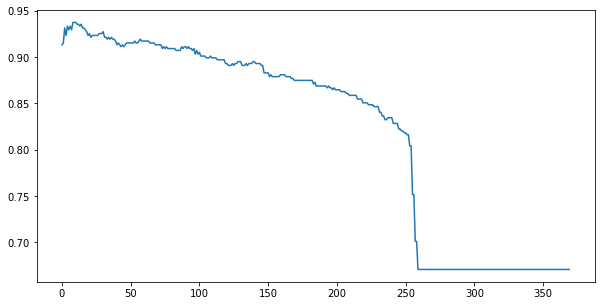

In [52]:
plt.figure(figsize = (10,5))
sns.lineplot(x=np.arange(KNN-1),y=scoring)

In [53]:
max(scoring)

0.9373737373737374

# Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [ ]:
# ANSWER
# Standarize X

In [ ]:
# ANSWER
# plot test accuracy by number of neighbors:

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)